In [1]:
# Cell 1: Install required packages (run once)
!pip install -q pandas numpy matplotlib seaborn plotly scikit-learn missingno tqdm joblib


In [2]:
# Cell 2: Imports & plotting config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')


In [4]:
# ============================================================
# 📂 Upload CSV directly (works in Colab or Jupyter)
# ============================================================
from google.colab import files
import io
import pandas as pd

# Upload your file
uploaded = files.upload()

# Automatically read the first uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("✅ File uploaded successfully!")
print("📄 Filename:", filename)
print("🧾 DataFrame shape:", df.shape)
df.head()

Saving COVID clinical trials.csv to COVID clinical trials.csv
✅ File uploaded successfully!
📄 Filename: COVID clinical trials.csv
🧾 DataFrame shape: (5783, 27)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [5]:
# Cell 4: Basic info & quick summary
df.info()
print("\nTop rows (describe include all):")
display(df.describe(include='all').T.head(30))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,5783.0,NaN,NaN,NaN,2892.0,1669.552635,1.0,1446.5,2892.0,4337.5,5783.0
NCT Number,5783,5783,NCT04680000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,5783,5775,Acalabrutinib Study With Best Supportive Care ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acronym,2480,2338,COVID-19,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,5783,12,Recruiting,2805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Study Results,5783,2,No Results Available,5747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conditions,5783,3067,COVID-19,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interventions,4897,4337,Other: No intervention,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outcome Measures,5748,5687,Mortality,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sponsor/Collaborators,5783,3631,Assistance Publique - Hôpitaux de Paris,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

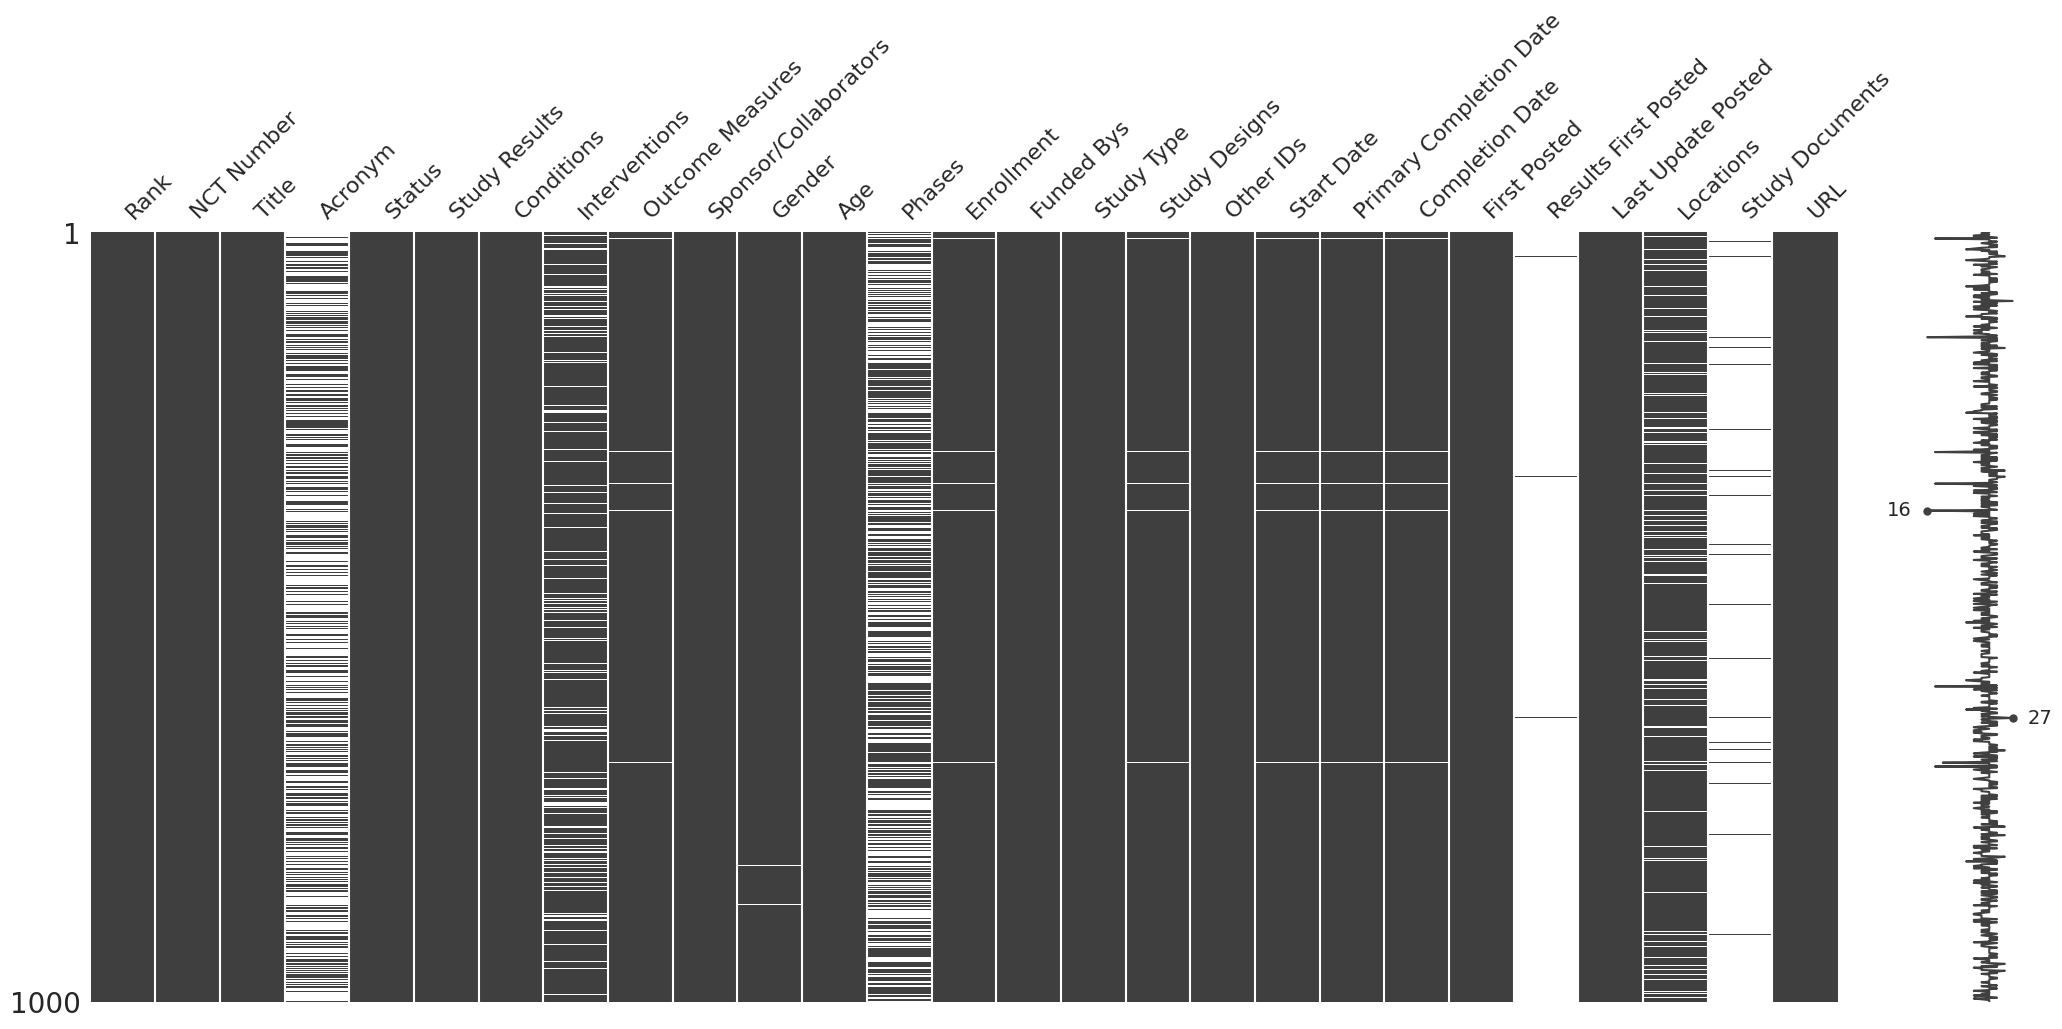

In [6]:
# Cell 5: Missing values analysis (percent missing)
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False).head(50)
# Visualize missingness (sample if huge)
msno.matrix(df.sample(min(1000, len(df))))


In [7]:
# Cell 6: Drop extremely high-missing columns (optional)
high_missing_cols = missing_percent[missing_percent > 90].index.tolist()
print("Columns with >90% missing (sample):", high_missing_cols[:20])
# Common guidance columns to drop (if present)
cols_to_drop = [c for c in ['Results First Posted', 'Study Documents'] if c in df.columns]
print('Dropping columns (if found):', cols_to_drop)
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


Columns with >90% missing (sample): ['Results First Posted', 'Study Documents']
Dropping columns (if found): ['Results First Posted', 'Study Documents']


In [8]:
# Cell 7: Remove duplicates and reset index
print('Shape before drop_duplicates:', df.shape)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print('Shape after drop_duplicates:', df.shape)


Shape before drop_duplicates: (5783, 25)
Shape after drop_duplicates: (5783, 25)


In [9]:
# Cell 8: Extract Country from Locations (if exists)
if 'Locations' in df.columns:
    countries = []
    for val in df['Locations'].fillna('Missing'):
        try:
            country = str(val).split(',')[-1].strip()
            if country == '':
                country = 'Missing'
        except Exception:
            country = 'Missing'
        countries.append(country)
    df['Country'] = countries
    print('Country feature added. Top countries:')
    display(df['Country'].value_counts().head(20))
else:
    print('No Locations column found; skipping Country extraction.')


Country feature added. Top countries:


,count
Country,
United States,1267
France,647
Missing,585
United Kingdom,306
Italy,235
Spain,234
Turkey,219
Canada,202
Egypt,192


In [10]:
# Cell 9: Convert date-like columns to datetime (if any)
date_cols = [c for c in df.columns if 'date' in c.lower() or c.lower().endswith('date') or 'start' in c.lower() or 'completion' in c.lower()]
print('Date-like columns found:', date_cols)
for c in date_cols:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce')
    except Exception:
        pass

# Example: create Duration_days if Start Date and Completion Date exist
if 'Start Date' in df.columns and 'Completion Date' in df.columns:
    df['Duration_days'] = (pd.to_datetime(df['Completion Date'], errors='coerce') - pd.to_datetime(df['Start Date'], errors='coerce')).dt.days
    print('Duration_days created.')
else:
    print('Start/Completion date columns not both present; Duration_days not created.')


Date-like columns found: ['Start Date', 'Primary Completion Date', 'Completion Date', 'Last Update Posted']
Duration_days created.


In [11]:
# Cell 10: Impute categorical missing values with placeholder
cat_cols = df.select_dtypes(include='object').columns.tolist()
cols_with_missing = [c for c in cat_cols if df[c].isnull().any()]
print('Categorical cols with missing:', cols_with_missing)

for c in cols_with_missing:
    df[c] = df[c].fillna(f"Missing_{c.replace(' ', '_')}")

print('Categorical imputation done.')



Categorical cols with missing: ['Acronym', 'Interventions', 'Outcome Measures', 'Gender', 'Phases', 'Study Designs', 'Other IDs', 'Locations']
Categorical imputation done.


In [12]:
# Cell 11: Handle numeric missing values (example for Enrollment)
# Assuming target is 'Enrollment'; if not present, update target variable later.
if 'Enrollment' in df.columns:
    print('Enrollment missing %:', df['Enrollment'].isnull().mean()*100)
    median_enroll = df['Enrollment'].median()
    df['Enrollment'] = df['Enrollment'].fillna(median_enroll)
    print('Filled Enrollment missing with median =', median_enroll)
else:
    print("No 'Enrollment' column found. If you want a different target, change the notebook accordingly.")


Enrollment missing %: 0.5879301400657099
Filled Enrollment missing with median = 170.0


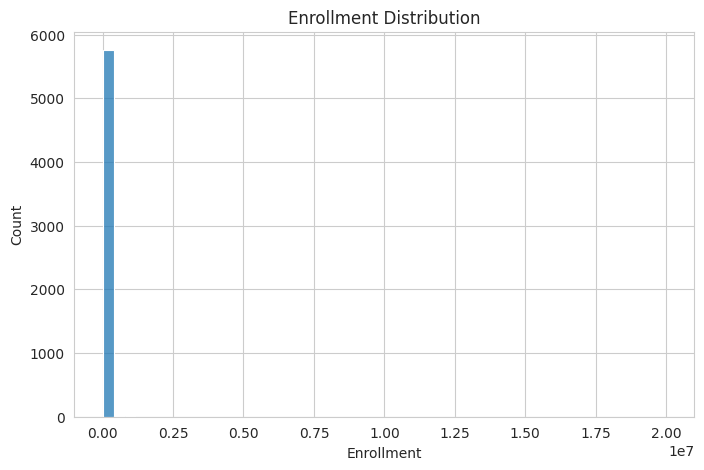

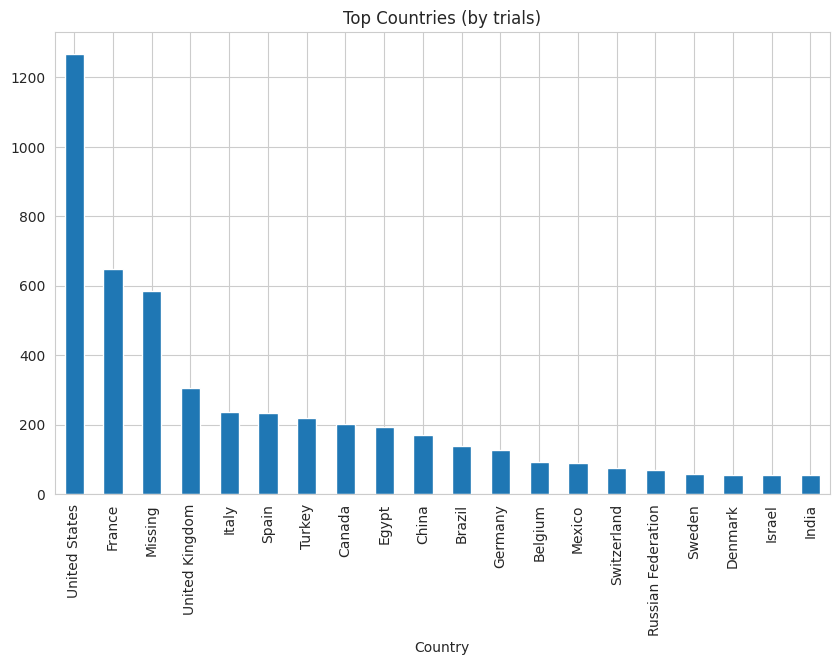

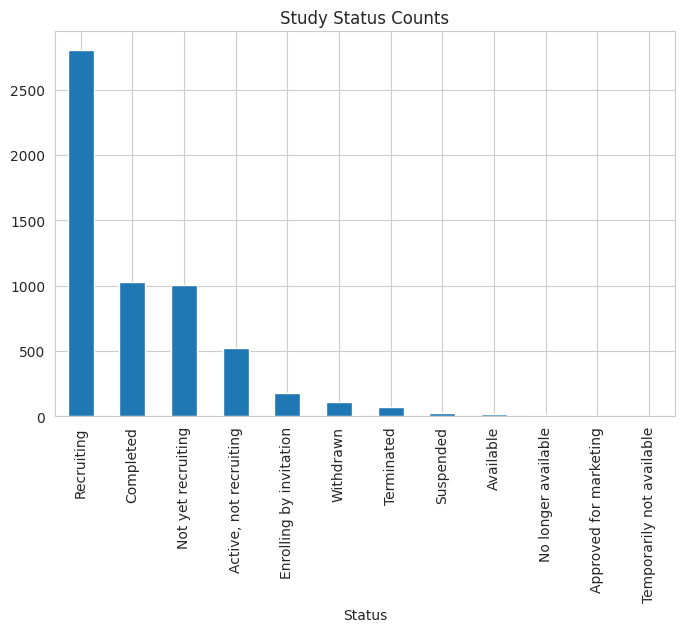

In [13]:
# Cell 12: Simple EDA — distributions and top categories
# Enrollment distribution
if 'Enrollment' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Enrollment'].dropna(), bins=50, kde=False)
    plt.title('Enrollment Distribution')
    plt.show()

# Top countries bar (if exist)
if 'Country' in df.columns:
    plt.figure(figsize=(10,6))
    df['Country'].value_counts().head(20).plot(kind='bar')
    plt.title('Top Countries (by trials)')
    plt.show()

# Count of studies by status if column exists
if 'Status' in df.columns:
    plt.figure(figsize=(8,5))
    df['Status'].value_counts().head(20).plot(kind='bar')
    plt.title('Study Status Counts')
    plt.show()


In [14]:
# Cell 13: Encode categorical variables (Label Encoding simple approach)
# We will create new columns with suffix _le for each categorical object column.
cat_cols = df.select_dtypes(include='object').columns.tolist()
print('Categorical columns to encode:', cat_cols[:40])
le = LabelEncoder()
for c in cat_cols:
    try:
        df[c+'_le'] = le.fit_transform(df[c].astype(str))
    except Exception as e:
        print('Encoding failed for', c, '-', e)
print('Label encoding completed. Encoded columns appended with _le suffix.')


Categorical columns to encode: ['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'First Posted', 'Locations', 'URL', 'Country']
Label encoding completed. Encoded columns appended with _le suffix.


In [15]:
# Cell 14: Prepare features (X) and target (y)
target = 'Enrollment'
if target not in df.columns:
    raise ValueError("Target 'Enrollment' not found. Change target variable or ensure column exists.")

# Choose numeric columns (including encoded categorical _le columns)
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in feature_cols if c != target]
print('Selected numeric features count:', len(feature_cols))
# Optionally drop IDs or irrelevant numeric columns if present (e.g., 'NCT Number' if numeric-like)
X = df[feature_cols].fillna(0)
y = df[target].fillna(df[target].median())


Selected numeric features count: 22


In [16]:
# Cell 15: Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (4626, 22) Test shape: (1157, 22)


In [17]:
# Cell 16: Train models — RandomForest & LinearRegression
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train_s, y_train)

print('Models trained: RandomForest and LinearRegression.')


Models trained: RandomForest and LinearRegression.


In [20]:
pip install -U scikit-learn


In [21]:
# ============================================================
# ✅ Fixed Model Evaluation Cell (compatible with old sklearn)
# ============================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # 👈 fixed here
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# RandomForest eval
rf_pred = rf.predict(X_test)
rf_mae, rf_rmse, rf_r2 = regression_metrics(y_test, rf_pred)
print('RandomForest -> MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}'.format(rf_mae, rf_rmse, rf_r2))

# LinearRegression eval
lr_pred = lr.predict(X_test_s)
lr_mae, lr_rmse, lr_r2 = regression_metrics(y_test, lr_pred)
print('LinearRegression -> MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}'.format(lr_mae, lr_rmse, lr_r2))


RandomForest -> MAE: 44205.289, RMSE: 466366.972, R2: -0.712
LinearRegression -> MAE: 39530.287, RMSE: 356624.945, R2: -0.001


,0
Interventions_le,3.062157e-01
First Posted_le,1.612816e-01
Rank,1.051002e-01
Other IDs_le,7.699692e-02
Duration_days,6.819432e-02
Title_le,4.120181e-02
Conditions_le,3.909873e-02
Sponsor/Collaborators_le,3.876637e-02
URL_le,3.183910e-02
Locations_le,3.092114e-02


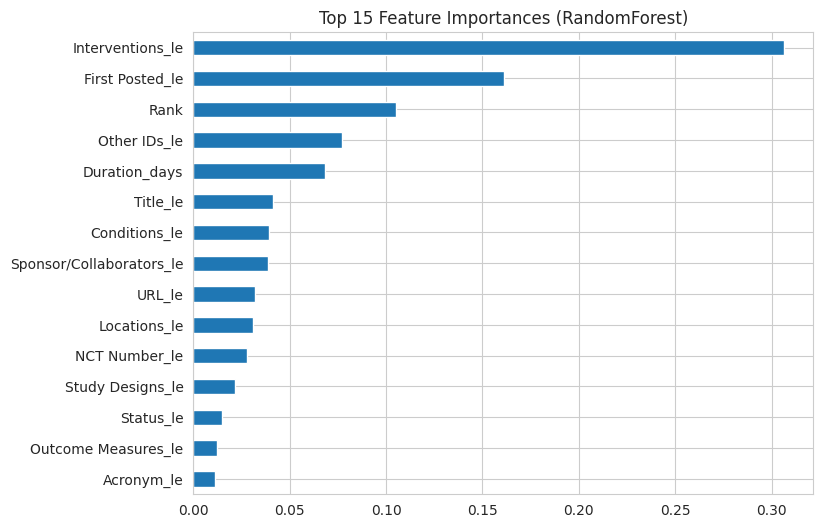

In [22]:
# Cell 18: Feature importance from RandomForest (top features)
if hasattr(rf, 'feature_importances_'):
    feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    display(feat_imp.head(30))
    plt.figure(figsize=(8,6))
    feat_imp.head(15).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title('Top 15 Feature Importances (RandomForest)')
    plt.show()
else:
    print('RandomForest has no feature_importances_.')


In [24]:
# ============================================================
# ✅ Cell 19: Save models & scaler safely (cross-platform)
# ============================================================
import joblib
import os

# Create a "models" folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save models locally
joblib.dump(rf, "models/rf_covid_trials.pkl")
joblib.dump(lr, "models/lr_covid_trials.pkl")
joblib.dump(scaler, "models/scaler_covid_trials.pkl")

print("✅ Models saved successfully inside /models folder:")
print("📁 models/rf_covid_trials.pkl")
print("📁 models/lr_covid_trials.pkl")
print("📁 models/scaler_covid_trials.pkl")


✅ Models saved successfully inside /models folder:
📁 models/rf_covid_trials.pkl
📁 models/lr_covid_trials.pkl
📁 models/scaler_covid_trials.pkl


In [25]:
from google.colab import files

files.download("models/rf_covid_trials.pkl")
files.download("models/lr_covid_trials.pkl")
files.download("models/scaler_covid_trials.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# ============================================================
# ✅ Cell 20: Conclusion & Suggestions
# ============================================================

print(
    "📘 Notebook finished successfully!\n\n"
    "✅ Suggestions for improvement:\n"
    "- Try target encoding or one-hot encoding for key categorical variables\n"
    "- Extract richer text features from study titles/conditions using TF-IDF or embeddings\n"
    "- Apply hyperparameter tuning (GridSearchCV / RandomizedSearchCV)\n"
    "- Experiment with advanced models like XGBoost or LightGBM for better accuracy\n"
    "- Optionally re-enable SHAP for explainability (removed as requested)"
)


📘 Notebook finished successfully!

✅ Suggestions for improvement:
- Try target encoding or one-hot encoding for key categorical variables
- Extract richer text features from study titles/conditions using TF-IDF or embeddings
- Apply hyperparameter tuning (GridSearchCV / RandomizedSearchCV)
- Experiment with advanced models like XGBoost or LightGBM for better accuracy
- Optionally re-enable SHAP for explainability (removed as requested)
